# Preprocessing Testing

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing


DATA_PATH = 'data/'

def load_vehicle_data(vehicles_path='data'):
  csv_path = os.path.join(vehicles_path, "project_data.csv")
  return pd.read_csv(csv_path)


def remove_vehicle_data_noise(vehicles):
  # Removing outlier vehicle prices that are dramatically outside standard deviation
  vehicles.drop(vehicles[vehicles['selling_price'] >= 1650000].index, inplace = True)

  # Removing vehicles older than 2000 due to sparse inconsistent data
  vehicles.drop(vehicles[vehicles['year'] < int("2000")].index, inplace = True)

  # Removing sparse high mileage vehicles
  vehicles.drop(vehicles[vehicles['km_driven'] >= 240000].index, inplace = True)

  # Removing 'Test Drive Car' instances since it's NOT numerically related to other owner types
  # AND NOT BEING USED FOR ONE HOT ENCODING
  vehicles.drop(vehicles[vehicles['owner'] == 'Test Drive Car'].index, inplace = True)

  # Remove 'Electric' 'fuel' type since only 1 instance
  vehicles.drop(vehicles[vehicles['fuel'] == 'Electric'].index, inplace = True)
  

def convert_categories_to_integers(vehicles):
  # Creating numerical value for number of owner strings
  current_owner_strings = ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']
  new_owner_strings = ['1', '2', '3', '4']
  vehicles['owner'] = vehicles['owner'].replace(current_owner_strings, new_owner_strings)
  vehicles['owner'] = vehicles['owner'].astype('int64') # Convert type to integers:

  # 0-indexing to convert category column's to be one hot encoded 
  current_owner_strings = ['Petrol', 'Diesel', 'CNG', 'LPG']
  new_strings = ['0', '1', '2', '3']
  vehicles['fuel'] = vehicles['fuel'].replace(current_owner_strings, new_strings)
  vehicles['fuel'] = vehicles['fuel'].astype('int64')

  current_owner_strings = ['Individual', 'Dealer', 'Trustmark Dealer']
  new_strings = ['0', '1', '2']
  vehicles['seller_type'] = vehicles['seller_type'].replace(current_owner_strings, new_strings)
  vehicles['seller_type'] = vehicles['seller_type'].astype('int64')

  current_owner_strings = ['Manual', 'Automatic']
  new_strings = ['0', '1']
  vehicles['transmission'] = vehicles['transmission'].replace(current_owner_strings, new_strings)
  vehicles['transmission'] = vehicles['transmission'].astype('int64')


def load_preprocessed_data():
  

  remove_vehicle_data_noise(vehicles)

  convert_categories_to_integers(vehicles)

  return vehicles


In [3]:
vehicles = load_vehicle_data()
vehicles.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## Removing Noise and converting Categories to Integers

In [4]:
remove_vehicle_data_noise(vehicles)

convert_categories_to_integers(vehicles)
vehicles.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,2


array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='selling_price', ylabel='year'>,
        <AxesSubplot:xlabel='km_driven', ylabel='year'>,
        <AxesSubplot:xlabel='fuel', ylabel='year'>,
        <AxesSubplot:xlabel='seller_type', ylabel='year'>,
        <AxesSubplot:xlabel='transmission', ylabel='year'>,
        <AxesSubplot:xlabel='owner', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='selling_price'>,
        <AxesSubplot:xlabel='selling_price', ylabel='selling_price'>,
        <AxesSubplot:xlabel='km_driven', ylabel='selling_price'>,
        <AxesSubplot:xlabel='fuel', ylabel='selling_price'>,
        <AxesSubplot:xlabel='seller_type', ylabel='selling_price'>,
        <AxesSubplot:xlabel='transmission', ylabel='selling_price'>,
        <AxesSubplot:xlabel='owner', ylabel='selling_price'>],
       [<AxesSubplot:xlabel='year', ylabel='km_driven'>,
        <AxesSubplot:xlabel='selling_price', ylabel='km_driven'>,
        <AxesSubplot:xla

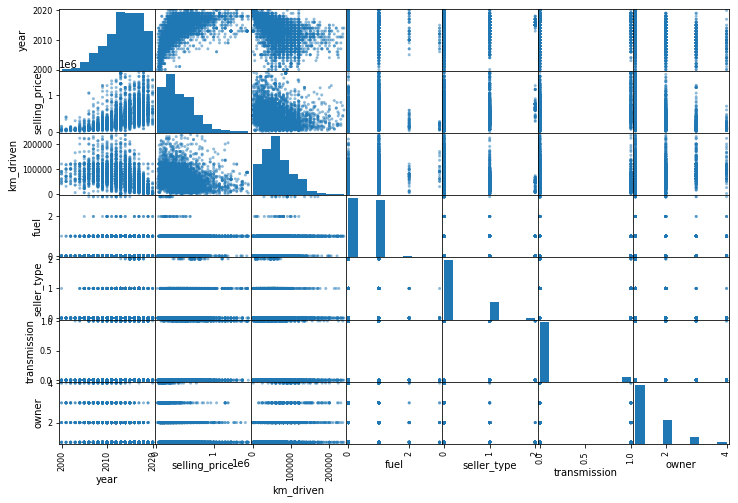

In [5]:
from pandas.plotting import scatter_matrix

attributes = ["year",	"selling_price", 	"km_driven",	"fuel",	"seller_type",	"transmission",	"owner"]
scatter_matrix(vehicles[attributes], figsize=(12, 8))

## Standardize Numerical Attributes

In [6]:
vehicles.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,2


In [7]:
def normalize_numerical_data_attributes(data):
  numerical_data = data[['year', 'km_driven', 'owner']].copy()
  normaled = (numerical_data - numerical_data.mean()) / numerical_data.std()
  data.drop(['year', 'km_driven', 'owner'], axis=1, inplace = True)

  data['year'] = normaled['year']
  data['km_driven'] = normaled['km_driven']
  data['owner'] = normaled['owner']

  return data
  
data = normalize_numerical_data_attributes(vehicles)
data.head()

,name,selling_price,fuel,seller_type,transmission,year,km_driven,owner
0,Maruti 800 AC,60000,0,0,0,-1.513495,0.112024,-0.644862
1,Maruti Wagon R LXI Minor,135000,0,0,0,-1.513495,-0.379909,-0.644862
2,Hyundai Verna 1.6 SX,600000,1,0,0,-0.267813,0.849923,-0.644862
3,Datsun RediGO T Option,250000,0,0,0,0.977870,-0.478295,-0.644862
4,Honda Amaze VX i-DTEC,450000,1,0,0,0.230460,1.858385,0.775833
